In [93]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
import numpy as np 
import matplotlib.pyplot as plt 

In [94]:
mnist = keras.datasets.mnist

In [95]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [96]:
print('Shape of train images :',train_images.shape)
print('Shape of train labels : ', train_labels.shape)
print('\nShape of test images : ', test_images.shape)
print("Shape of test labels : ",test_labels.shape)

Shape of train images : (60000, 28, 28)
Shape of train labels :  (60000,)

Shape of test images :  (10000, 28, 28)
Shape of test labels :  (10000,)


In [97]:
print('train labels : ',train_labels)

train labels :  [5 0 4 ... 5 6 8]


In [98]:
print(train_images[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

First 10 train images in MNIST dataset



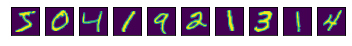


Train labels match with Train label sequentialy
 [5 0 4 1 9 2 1 3 1 4]


In [144]:
print('First 10 train images in MNIST dataset\n')
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i])
plt.show()
print('\nTrain labels match with Train label sequentialy\n',train_labels[:10])

In [145]:
train_images = tf.reshape(train_images, [-1, 28, 28, 1])
test_images = tf.reshape(test_images, [-1, 28, 28, 1])

In [148]:
def select_model(model_number):
    if model_number == 1:
        model = keras.models.Sequential([
                    keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (28, 28,1)),  
                    keras.layers.MaxPool2D((3,3)),                                                  
                    keras.layers.Flatten(),
                    keras.layers.Dense(10, activation = 'softmax')])                                

    if model_number == 2:
        model = keras.models.Sequential([
                    keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape=(28,28,1)),     
                    keras.layers.MaxPool2D((3,3)),                                                  
                    keras.layers.Conv2D(64, (3,3), activation = 'relu'),                             
                    keras.layers.MaxPool2D((3,3)),                                                  
                    keras.layers.Flatten(),
                    keras.layers.Dense(10, activation = 'softmax')])                                
                    
    if model_number == 3: 
        model = keras.models.Sequential([
                    keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (28, 28,1)),  
                    keras.layers.MaxPool2D((2,2)),                                                  
                    keras.layers.Conv2D(64, (3,3), activation = 'relu'),                            
                    keras.layers.Conv2D(64, (3,3), activation = 'relu'),                            
                    keras.layers.MaxPool2D((2,2)),                                                  
                    keras.layers.Conv2D(128, (3,3), activation = 'relu'),                           
                    keras.layers.Flatten(),
                    keras.layers.Dense(10, activation = 'softmax')])                                
        
    return model 

In [149]:
model = select_model(3)

In [150]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 conv2d_24 (Conv2D)          (None, 9, 9, 64)          36928     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 4, 4, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 2, 2, 128)       

In [151]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [152]:
model.fit(train_images, train_labels,  epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 137s 73ms/step - loss: 0.1929 - accuracy: 0.9539
Epoch 2/5
1875/1875 [==============================] - 147s 78ms/step - loss: 0.0588 - accuracy: 0.9818
Epoch 3/5
1875/1875 [==============================] - 152s 81ms/step - loss: 0.0449 - accuracy: 0.9865
Epoch 4/5
1875/1875 [==============================] - 146s 78ms/step - loss: 0.0409 - accuracy: 0.9876
Epoch 5/5
1875/1875 [==============================] - 141s 75ms/step - loss: 0.0316 - accuracy: 0.9908


In [153]:
test_loss, accuracy = model.evaluate(test_images, test_labels, verbose = 2)
print('\nTest loss : ', test_loss) 
print('Test accuracy :', accuracy)

313/313 - 7s - loss: 0.0550 - accuracy: 0.9842 - 7s/epoch - 23ms/step

Test loss :  0.05497388914227486
Test accuracy : 0.9842000007629395


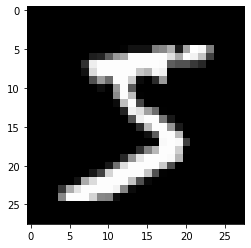

In [154]:
plt.imshow(train_images[0], cmap = 'gray')
plt.show()

In [155]:
test_images = tf.cast(test_images, tf.float32)
pred = model.predict(test_images)
number = [0,1,2,3,4,5,6,7,8,9]

313/313 [==============================] - 9s 29ms/step


In [156]:
print('Prediction : ', pred.shape)
print('Test labels : ', test_labels.shape)

Prediction :  (10000, 10)
Test labels :  (10000,)


In [157]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(Number[predicted_label],
                                100*np.max(predictions_array),
                                Number[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  plt.xticks(Number)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


In [158]:
(train_images, train_labels), (test_images, test_labels) =  mnist.load_data()

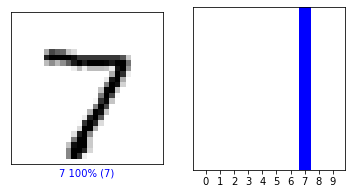

In [159]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, pred, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, pred,  test_labels)
plt.show()

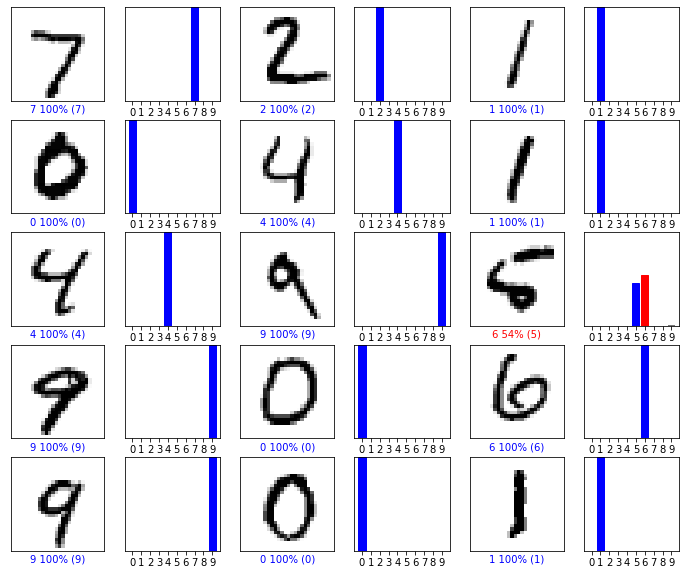

In [160]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, pred, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, pred, test_labels)
plt.show()

In [161]:
def error_mnist(prediction_array, true_label):
    error_index = []
    
    for i in range(true_label.shape[0]):
        if np.argmax(prediction_array[i]) != true_label[i]:
            error_index.append(i)
    return error_index
 
def plot_error(index, prediction_array, true_label):
    num_cols = 3
    num_rows = 5
    plt.figure(figsize=(2*2*num_cols, 2*num_rows))

    assert len(index) < num_cols * num_rows
    for i in range(len(index)):
        plt.subplot(num_rows, 2*num_cols, 2*i+1)
        idx = index[i]
        plt.imshow(test_images[idx])
        plt.subplot(num_rows, 2*num_cols, 2*i+2)
        plt.bar(range(10), prediction_array[idx])
        plt.xticks(Number)

In [162]:
index = error_mnist(pred, test_labels)
index_slice = index[:10]
print(index[:10])

[8, 115, 247, 259, 320, 321, 445, 447, 449, 495]


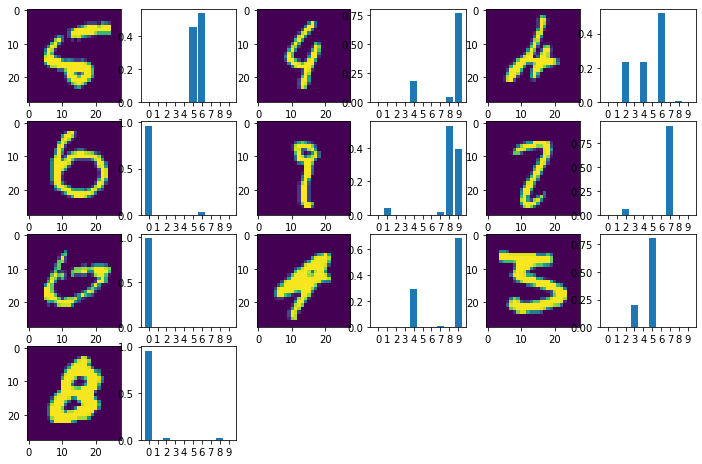

In [163]:
plot_error(index_slice, pred, test_labels)